In [1]:
%load_ext autoreload
%autoreload 2

import healpy as hp
import numpy as np
from astropy.io import fits
from pixell import enmap, enplot, utils, reproject, curvedsky
import os

from assets import act_car as act
from assets import make_galaxy_map as mgm

## Reading cls and plotting

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plot_left = 5
plot_right = 5
ggpath = '/mnt/c/Users/gdzhao/projects/unwise_sz/unwiseact_results/car/gg_results.txt'

gg = np.loadtxt(ggpath,skiprows=1)
print(gg.shape)

yypath = '/mnt/c/Users/gdzhao/projects/unwise_sz/unwiseact_results/car/cibdbeta_yy_results.txt'

yy = np.loadtxt(yypath,skiprows=1)
print(yy.shape)

(122, 2)
(122, 2)


## Results of gy in other articles

In [arXiv:2206.05689v2](https://arxiv.org/abs/2206.05689), (Cross Correlation between thermal Sunyaev-Zel’dovich effect and projected galaxy density field)

The clyy from planck tsz is shown in ayo_gg and ayo_yy:

In [3]:
path_AYO = '/mnt/c/Users/gdzhao/projects/unwise_sz/unwiseact_results/AYODEJI_etal/cl.png.csv'

cl_AYO = np.loadtxt(path_AYO,delimiter=',',skiprows=1)
print(cl_AYO.shape)

ell_AYO = cl_AYO[:,0]
cl_AYO_yy = cl_AYO[:,1]/1e16
cl_AYO_gg = cl_AYO[:,5]/1e4
print(cl_AYO_yy)

(19, 10)
[3.91571e-16 3.94016e-16 3.41793e-16 3.20770e-16 1.84170e-16 1.11424e-16
 7.95110e-17 5.54030e-17 4.49360e-17 3.92110e-17 3.24960e-17 2.44930e-17
 2.08620e-17 1.80250e-17 1.52640e-17 1.36140e-17 1.22210e-17 1.15730e-17
 1.25890e-17]


In [ ]:
# cl_gg = np.array([[8.34618970e-06, 3.46631632e-06, 2.03358031e-06, 1.38903814e-06,
        9.91403327e-07, 7.70258397e-07, 6.33512966e-07, 5.21690152e-07,
        4.55344630e-07, 4.09384998e-07, 3.70867024e-07, 3.36947369e-07,
        3.15094625e-07, 2.92852297e-07, 2.76479554e-07, 2.56301888e-07,
        2.45004012e-07, 2.35061521e-07, 2.22673894e-07, 2.15804267e-07,
        2.08599831e-07, 2.01561764e-07, 1.94275062e-07, 1.88854267e-07,
        1.86711253e-07, 1.80231655e-07, 1.75568470e-07, 1.73052662e-07,
        1.68248636e-07, 1.65422698e-07, 1.63288833e-07, 1.59434908e-07,
        1.54947228e-07, 1.53454601e-07, 1.52742961e-07, 1.48250439e-07,
        1.47622957e-07, 1.44788048e-07, 1.42773038e-07, 1.41153413e-07,
        1.39851513e-07, 1.36669739e-07, 1.36047513e-07, 1.35840810e-07,
        1.33228993e-07, 1.32417071e-07, 1.29770161e-07, 1.29207754e-07,
        1.28377958e-07, 1.27418906e-07, 1.26812072e-07, 1.25422195e-07,
        1.23903728e-07, 1.24031908e-07, 1.22827027e-07, 1.22373056e-07,
        1.21770019e-07, 1.20583770e-07, 1.20119715e-07, 1.19328791e-07,
        1.18072465e-07, 1.17932191e-07, 1.16876067e-07, 1.15645853e-07,
        1.15837046e-07, 1.14991326e-07, 1.15413080e-07, 1.14597802e-07,
        1.13253956e-07, 1.13509821e-07, 1.12261005e-07, 1.12119343e-07,
        1.11389192e-07, 1.11756710e-07, 1.10182353e-07, 1.09842637e-07,
        1.10069479e-07, 1.09656798e-07, 1.09015016e-07, 1.08938090e-07,
        1.08095092e-07, 1.07827958e-07, 1.07518487e-07, 1.06750813e-07,
        1.07567760e-07, 1.06126538e-07, 1.06065391e-07, 1.04985720e-07,
        1.04434744e-07, 1.04401028e-07, 1.04035588e-07, 1.02717420e-07,
        1.02945157e-07, 1.02193026e-07, 1.01156639e-07, 1.01099464e-07,
        1.00851246e-07, 9.99927428e-08, 9.94249381e-08, 9.92816450e-08,
        9.87146863e-08, 9.80186127e-08, 9.73996430e-08, 9.68281661e-08,
        9.68358603e-08, 9.58495005e-08, 9.55759191e-08, 9.54762300e-08,
        9.45580339e-08, 9.45900154e-08, 9.38378004e-08, 9.37695855e-08,
        9.38789567e-08, 9.30710922e-08, 9.27925676e-08, 9.22954705e-08,
        9.22770020e-08, 9.18147576e-08, 9.19709847e-08, 9.20142687e-08,
        9.29338870e-08, 9.50940588e-08]])

In [4]:
cl_yy = np.array([[5.02925066e-14, 2.45674995e-15, 1.53136377e-15, 8.65259777e-16,
        5.94105431e-16, 4.40445533e-16, 3.43411113e-16, 2.80521884e-16,
        2.57374530e-16, 2.47333938e-16, 2.38385167e-16, 2.27438380e-16,
        2.00484112e-16, 1.89403887e-16, 1.83609348e-16, 1.87012895e-16,
        1.86160839e-16, 1.66797283e-16, 1.39853318e-16, 1.13300054e-16,
        1.01019509e-16, 1.01939353e-16, 9.99026264e-17, 8.92766646e-17,
        7.55382944e-17, 6.24712248e-17, 5.65596033e-17, 5.73501934e-17,
        5.58926106e-17, 4.95743516e-17, 4.06431983e-17, 3.27108604e-17,
        2.84496281e-17, 2.66302835e-17, 2.57973063e-17, 2.39754632e-17,
        2.14817606e-17, 1.88977344e-17, 1.74303491e-17, 1.68137919e-17,
        1.61566193e-17, 1.58732821e-17, 1.48526389e-17, 1.38526762e-17,
        1.31910535e-17, 1.27488968e-17, 1.28348594e-17, 1.26242740e-17,
        1.23823630e-17, 1.24154862e-17, 1.23507744e-17, 1.23320816e-17,
        1.26374230e-17, 1.26508175e-17, 1.28939667e-17, 1.30198679e-17,
        1.31147869e-17, 1.33409362e-17, 1.34230323e-17, 1.36835820e-17,
        1.38162363e-17, 1.42008709e-17, 1.43475238e-17, 1.48578199e-17,
        1.51149392e-17, 1.53573467e-17, 1.57509563e-17, 1.63134624e-17,
        1.66192731e-17, 1.72889975e-17, 1.75266642e-17, 1.83977102e-17,
        1.89488667e-17, 1.99197164e-17, 2.08083757e-17, 2.19789735e-17,
        2.30671899e-17, 2.45768152e-17, 2.59898383e-17, 2.75519312e-17,
        2.92702088e-17, 3.13661407e-17, 3.47310441e-17, 3.90389929e-17,
        4.53320128e-17, 5.51423216e-17, 6.68406724e-17, 8.12090522e-17,
        9.68321393e-17, 1.09507904e-16, 1.22389214e-16, 1.30218823e-16,
        1.31855277e-16, 1.36253057e-16, 1.39061011e-16, 1.42590942e-16,
        1.44698482e-16, 1.47662648e-16, 1.48478066e-16, 1.52246538e-16,
        1.55752130e-16, 1.64121310e-16, 1.69293796e-16, 1.79509274e-16,
        1.83453530e-16, 1.91458003e-16, 1.99000577e-16, 2.06256551e-16,
        2.12112779e-16, 2.14909451e-16, 2.19466636e-16, 2.20025322e-16,
        2.19728741e-16, 2.18382699e-16, 2.20764855e-16, 2.18737490e-16,
        2.19820056e-16, 2.22447172e-16, 2.24458195e-16, 2.28402387e-16,
        2.33362203e-16, 2.45430840e-16]])

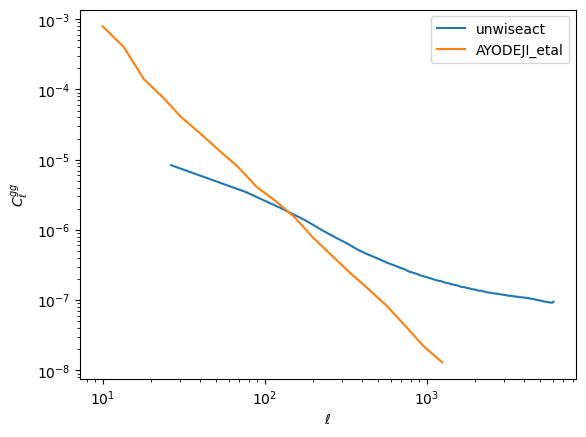

In [5]:
ells = gg[:,0]
clgg = gg[:,1]
plls = ells*(ells+1)/(2*np.pi)

plt.plot(ells, clgg,label = 'unwiseact')
plt.plot(ell_AYO,cl_AYO_gg,label='AYODEJI_etal')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}^{gg}$')
plt.legend()

In [7]:
# print(yy[:,1])

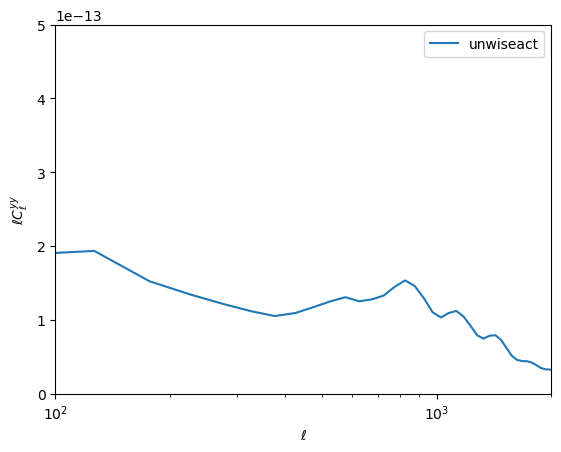

In [8]:
ells = yy[:,0]
clyy = yy[:,1]
plls = ells*(ells+1)/(2*np.pi)

# plot_left = 5
# plot_right = 20
# plt.plot(ell_AYO, cl_AYO_yy,label = 'AYO_et_al')
plt.plot(ells, (ells*clyy),label = 'unwiseact')
plt.xscale('log')
# plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.xlim(1e2,2e3)
plt.ylim(0e-14,5e-13)
# plt.ylabel(r'$(\ell+1)\ell C_{\ell}^{yy}/2\pi$')
plt.ylabel(r'$\ell C_{\ell}^{yy}$')
plt.legend()
plt.show()

Comparison with ACT

CIB ($T_{CIB}=10.7, beta = 1.7$)

### The old result using healpix

In [32]:
OUTPATH = '/mnt/c/Users/gdzhao/projects/unwise_sz/unwiseact_results/'

def read_results(path:str):
    # ignore the '#' in the header
    
    data = np.loadtxt(path,skiprows=1)
    header = open(path).readline().strip().split()
    header.remove('#')
    table = {header[i]:data[:,i] for i in range(len(header))}
    return table

In [33]:
table = read_results('/mnt/c/Users/gdzhao/projects/unwise_sz/unwiseact_results/healpix/cibdBeta_results_first_sample.txt')
print(table.keys())

dict_keys(['ell', 'cibdBeta_1.0_T_10.7_gy', 'cibdBeta_1.0_T_10.7_yy', 'cibdBeta_1.2_T_10.7_gy', 'cibdBeta_1.2_T_10.7_yy'])


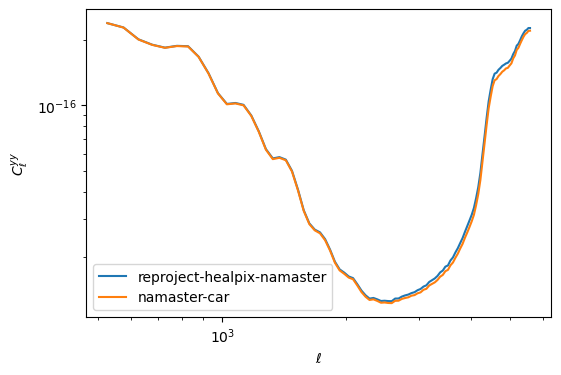

In [ ]:
ell = table['ell']
pll = ell*(ell+1)/(2*np.pi) # Power spectrum normalization

def infer_params_from_string(s):
    parts = s.split('_')
    beta = float(parts[1])
    T = float(parts[3])
    return beta, T

plot_left = 10
plot_right = 10
fig,ax = plt.subplots(1,1, figsize=(6,4))
# for models in table.keys():
#     if models == 'ell':
#         continue
#     if '_gy' in models:
#         continue   
#     beta, T = infer_params_from_string(models)
#     print('beta =', beta, 'T =', T)
#     data = table[models]
#     # hp.write_cl('cibdBeta_cl_beta{:.2f}_T{:.2f}.fits'.format(beta, T), data/pll)


model = 'cibdBeta_1.0_T_10.7_yy'
data = table[model]
ax.plot(ell[plot_left:-plot_right], (data)[plot_left:-plot_right], label='reproject-healpix-namaster')

ells = yy[:,0]
clyy = yy[:,1]
plls = ells*(ells+1)/(2*np.pi)

ax.plot(ells[plot_left:-plot_right], clyy[plot_left:-plot_right],label = 'namaster-car')

# ax.plot(ell[plot_left:-plot_right], pll[plot_left:-plot_right]*2e-16, label='l(l+1)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C_\ell^{yy}$')
ax.legend()
plt.show()

### Error in computing gy

Traceback (most recent call last):
  File "/mnt/c/Users/gdzhao/projects/unwise_sz/unwiseact_car.py", line 75, in <module>
    cl_gy = nmt.compute_full_master(g_field, y_field, b)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/zgd/miniconda3/envs/namaster/lib/python3.11/site-packages/pymaster/workspaces.py", line 574, in compute_full_master
    raise ValueError("Fields must have same resolution")
ValueError: Fields must have same resolution

In [3]:
# codex = act.get_ymap_index_act(verbose=True)
selected_maps = act.get_ymap_index_act_selected(deprotype='cib',beta_range=[1.0,1.1],T_range=[10,12],verbose=True)

selected map object of cib with beta = 1.0, T = 10.7


In [4]:
ymap, wcs = selected_maps[0].read_map_to_array()

In [5]:
mask, wcs = act.read_composite_mask_to_array()

## Severe Memory limit exceeded.

Need computational resources, now!

For the time being, I will downgrade the map by a factor of 2 in ```unwiseact_car.py```

In [6]:
import pymaster as nmt

y_field = nmt.NmtField(mask, [ymap], wcs = wcs, n_iter=0)

: 

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.title('ACT CIB map')
plt.imshow(y_field.get_maps()[0], interpolation='nearest',origin='lower')
plt.colorbar()
plt.show()